ここでは，
> Data Preprocessing, Analysis & Visualization – Python Machine Learning https://data-flair.training/blogs/python-ml-data-preprocessing/

を写経し，最後にPCAを実装する．

# １．目的
以下について学ぶ
- データの前処理
    - 再スケジューリング
    - 標準化
    - 正規化
    - 二値化
- データの分析
- データの可視化

その後データの分析と可視化，そして python のデータ前処理テクニックを異なる歩幅（step）で学んでいく．

# ２．Python機械学習におけるデータ前処理
機械学習のアルゴリズムは生データの処理に適していないので，データを前処理する必要がある．
また，情報が必要な機械学習モデル（MLモデル）がある．本チュートリアルでは，scikit-learn または sklearn のライブラリを使用する． 

# ３．Python データ処理テクニック！！
Python のデータ処理テクニックについて 7 つの方法を学んでいく

## a．データの再スケーリング
様々なスケール（値の単位や範囲）の属性を持つデータは，同じスケールとなるように属性の変更ができる．特に，属性を0から1の範囲に再スケーリングすることを**正規化**と呼ぶ． scikit-learnのMinMaxScalerクラスを使用する．

In [4]:
import pandas, scipy, numpy
from sklearn.preprocessing import MinMaxScaler
df = pandas.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ',
    sep=';')

array = df.values
#データを出力コンポーネントと入力コンポーネントへ分離
x = array[:, 0:8]
y = array[:, 8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(x)
numpy.set_printoptions(precision = 3)# 出力の精度を設定する
rescaledX[0:5, :]

array([[0.248, 0.397, 0.   , 0.068, 0.107, 0.141, 0.099, 0.568],
       [0.283, 0.521, 0.   , 0.116, 0.144, 0.338, 0.216, 0.494],
       [0.283, 0.438, 0.04 , 0.096, 0.134, 0.197, 0.17 , 0.509],
       [0.584, 0.11 , 0.56 , 0.068, 0.105, 0.225, 0.191, 0.582],
       [0.248, 0.397, 0.   , 0.068, 0.107, 0.141, 0.099, 0.568]])

上記のプログラムは，０～１までの値を与えます．再スケジューリングデータは，ニューラルネットワーク，
最適化アルゴリズム及び k 最近傍法のような距離尺度と回帰のような重みつき入力を用いているものに使用されている．

## b．データの標準化
標準化によりガウス分布と様々な平均および標準偏差で属性を取得し、それらを平均 0 、標準偏差 1 の標準ガウス分布に変換できる．StandardScalerクラスを使用して変換する．

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)
rescaledX[0:5, :]

array([[-0.528,  0.962, -1.391, -0.453, -0.244, -0.466, -0.379,  0.558],
       [-0.299,  1.967, -1.391,  0.043,  0.224,  0.873,  0.624,  0.028],
       [-0.299,  1.297, -1.186, -0.169,  0.096, -0.084,  0.229,  0.134],
       [ 1.655, -1.384,  1.484, -0.453, -0.265,  0.108,  0.412,  0.664],
       [-0.528,  0.962, -1.391, -0.453, -0.244, -0.466, -0.379,  0.558]])

## c．データの正規化
このタスクでは，各観測値を長さ１（単位ノルム）に再スケーリングする．これにはNormalizerクラスを使用する．

In [6]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x)
normalizedX=scaler.transform(x)
normalizedX[0:5, :]

array([[2.024e-01, 1.914e-02, 0.000e+00, 5.196e-02, 2.079e-03, 3.008e-01,
        9.299e-01, 2.729e-02],
       [1.083e-01, 1.222e-02, 0.000e+00, 3.611e-02, 1.361e-03, 3.472e-01,
        9.306e-01, 1.385e-02],
       [1.377e-01, 1.342e-02, 7.061e-04, 4.060e-02, 1.624e-03, 2.648e-01,
        9.533e-01, 1.760e-02],
       [1.767e-01, 4.416e-03, 8.833e-03, 2.997e-02, 1.183e-03, 2.681e-01,
        9.464e-01, 1.574e-02],
       [2.024e-01, 1.914e-02, 0.000e+00, 5.196e-02, 2.079e-03, 3.008e-01,
        9.299e-01, 2.729e-02]])

## d．データの二値化
閾値を二値化では，1 より大きい値と 0 以下の値に印をつけることでデータを変換できる．ここでは Blinarizer クラスを使用する．


In [7]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.0).fit(x)
binaryX = binarizer.transform(x)
binaryX[0:5, :]

array([[1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1.]])

上記の例では，0 以下のすべての値に対し 0 をつけ，残りの値に対し 1 を付けている．確率を鮮明な値にしたい場合便利である．

## e．中心化(Mean Removal)
各特長より平均を削除して，その中心を 0 にする．PCAで使われているイメージ．

In [8]:
from sklearn.preprocessing import scale
data_standardized = scale(df)
data_standardized.mean(axis = 0)

array([ 3.555e-16,  1.733e-16, -8.887e-17, -1.244e-16,  3.910e-16,
       -6.221e-17,  4.444e-17,  2.364e-14,  2.862e-15,  6.754e-16,
        1.066e-16,  8.887e-17])

In [9]:
data_standardized.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## f．One Hot Encoding
大きさを定義できないものに使用する（血液型，性別，単語，・・・）．ｋ個の異なる値について、要素の一つを 1 とし，他を 0 としたｋ次元ベクトル（One Hot Vector）に変換する．

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(
[[0,1,6,2],
[1,5,3,5],
[2,4,2,7],
[1,0,4,2]
])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [11]:
encoder.transform([[2,4,3,4]]).toarray()

array([[0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.]])

# g. Label Encoding
ラベルを数字によって表現する．

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
input_classes = ['Havells', 'Philips', 'Syska', 'Eveready', 'Lloyd']
label_encoder.fit(input_classes)

LabelEncoder()

In [13]:
for i, item in enumerate(label_encoder.classes_):
    print(item, '-->', i)

Eveready --> 0
Havells --> 1
Lloyd --> 2
Philips --> 3
Syska --> 4


上記のプログラムで数値ラベルが割り振られる．以下でそれを確認する．

In [14]:
labels = ['Lloyd', 'Syska', 'Philips']
label_encoder.transform(labels)

array([2, 4, 3], dtype=int64)

In [15]:
label_encoder.inverse_transform(label_encoder.transform(labels))

C:\Users\admin\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Lloyd', 'Syska', 'Philips'], dtype='<U8')

# ４．Python での機械学習を用いたデータ解析
データをもっと見つけ出そう！（ここからはPandas が使える前提）．

## a．データセットの記述
describe() メソッドを使用して、count、mean、std、maxなどのパラメータを見つけ出す．

In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# b．データセットの型式
簡単に言うとタプルの型式はデータセットの大きさを示す．

In [17]:
df.shape

(1599, 12)

## c．データセットからデータの抽出
データセットの先頭 10 行のみが必要な場合，head() メソッドで呼び出すことができる．この時，引数に 10 を渡す．

In [18]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## d．変数に対する操作の実行
変数に対して実行できる操作がいくつか用意されている．
ここでは、データをグループ化して操作する方法を示す．これには，groupby() 関数を使う．

In [19]:
df.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

# 5．python 機械学習における単変量データプロットの可視化
最後にデータをグラフや図として，可視化して詳細を知りたい場合には，Matplotlib を利用した pandas が使える．
ここでは単変量及び多変量の 2 種類について説明する．

ちなみに，単変量プロットとは，変数が一つだけのことである．

# a．ヒストグラム
ヒストグラムはビンごとにデータをグループ化し，ビンが保有する観測値を返してくれるため，機械学習における良い可視化手法である．
ビンの型式は，属性の状態を示す．例えばガウス分布であるか，歪んでいるか，指数分布など．また，異常値かあるかどうかのヒントも返す．

In [20]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

上記のヒストグラムから属性 **total sulfur dioxide**，**free sulfur dioxide** 及び **esidual sugar** が指数分布であることが予想される．属性 **density**，**pH**，**fixed acidity** 及び **Volatile acidity** ガウス分布またはそれに近い分布であることが予想される．

## b．密度プロット（density plot）
密度プロットはヒストグラムを抽象化したもののように見える．各ビンが曲線を表す．

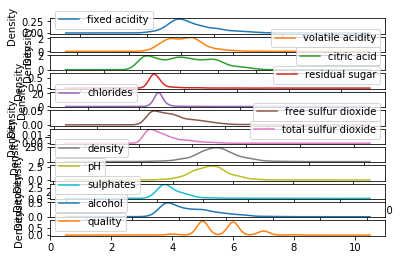

In [21]:
df.plot(kind = 'density', subplots = True, sharex = False)
plt.show()

こちらの方が分かりすい

## c．箱ひげ図
箱部分は各属性がどう脳に分布しているかをします．中央値，25%，75% に恥日線を引く．
へげ部分は土嚢用にデータが分布しているかを示す．

fixed acidity              AxesSubplot(0.125,0.125;0.0545775x0.755)
volatile acidity        AxesSubplot(0.190493,0.125;0.0545775x0.755)
citric acid             AxesSubplot(0.255986,0.125;0.0545775x0.755)
residual sugar          AxesSubplot(0.321479,0.125;0.0545775x0.755)
chlorides               AxesSubplot(0.386972,0.125;0.0545775x0.755)
free sulfur dioxide     AxesSubplot(0.452465,0.125;0.0545775x0.755)
total sulfur dioxide    AxesSubplot(0.517958,0.125;0.0545775x0.755)
density                 AxesSubplot(0.583451,0.125;0.0545775x0.755)
pH                      AxesSubplot(0.648944,0.125;0.0545775x0.755)
sulphates               AxesSubplot(0.714437,0.125;0.0545775x0.755)
alcohol                  AxesSubplot(0.77993,0.125;0.0545775x0.755)
quality                 AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

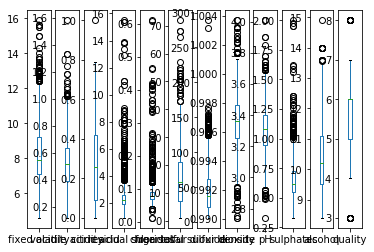

In [22]:
df.plot(kind = 'box', subplots = True, sharex = False, sharey = False)

# 6．python での機械学習における多変量データプロットの可視化